In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# Replace 'filename.csv' with the actual filename and extension of your dataset
file_path = r'E:\report\data\dementia_dataset(373).csv'

# Read the dataset
df = pd.read_csv(file_path)  # Use pd.read_excel() for Excel files, pd.read_json() for JSON files, etc.



# Replace 'M' and 'F' values with 1 and 0 respectively in the 'M/F' column
df['M/F'] = df['M/F'].map({'F': 0, 'M': 1})

In [ ]:
df=df.replace('Nondemented', 0).replace('Demented', 1).replace('Converted',2)

In [ ]:
# Imputing missing values in the 'SES' column with the mode
df.SES.fillna(df.SES.mode()[0], inplace=True)

# Imputing missing values in the 'MMSE' column with the mean
df.MMSE.fillna(df.MMSE.mean(), inplace=True)

df.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df = df.drop(['MRI ID', 'Hand'], axis=1)

In [ ]:
# Drop duplicate rows based on 'Subject ID'
df.drop_duplicates(subset='Subject ID', inplace=True)

In [ ]:
df

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,1,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,0,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,0,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,1,1,0,1,71,16,2.0,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,1,1,0,1,73,12,2.0,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,0,1,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,1,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,1,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Group,150.0,0.613333,0.653197,0.000,0.000,1.0000,1.00000,2.000
Visit,150.0,1.000000,0.000000,1.000,1.000,1.0000,1.00000,1.000
MR Delay,150.0,0.000000,0.000000,0.000,0.000,0.0000,0.00000,0.000
M/F,150.0,0.413333,0.494081,0.000,0.000,0.0000,1.00000,1.000
Age,150.0,75.446667,7.545421,60.000,70.000,75.0000,80.00000,96.000
EDUC,150.0,14.533333,2.874714,6.000,12.000,14.0000,16.00000,23.000
SES,150.0,2.466667,1.103178,1.000,2.000,2.0000,3.00000,5.000
MMSE,150.0,27.560000,2.968470,17.000,26.000,29.0000,30.00000,30.000
CDR,150.0,0.260000,0.326256,0.000,0.000,0.0000,0.50000,1.000
eTIV,150.0,1474.426667,174.683889,1123.000,1347.250,1453.5000,1565.25000,1987.000


In [ ]:
# Drop non-numeric columns
non_numeric_columns = ['Subject ID']  # Assuming these are the non-numeric columns
df = df.drop(columns=non_numeric_columns)

In [ ]:
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,1,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
5,0,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,0,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,1,1,0,1,71,16,2.0,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...
359,1,1,0,1,73,12,2.0,23.0,0.5,1661,0.698,1.056
361,0,1,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,1,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,1,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Group'])
y = df['Group']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the SVM model
svm_model = SVC(kernel='linear', gamma='auto', C=10)  # You can adjust the hyperparameters as needed

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       1.00      1.00      1.00        14
           2       0.00      0.00      0.00         5

    accuracy                           0.87        45
   macro avg       0.61      0.65      0.63        45
weighted avg       0.79      0.87      0.83        45

Confusion Matrix:
[[25  0  1]
 [ 0 14  0]
 [ 5  0  0]]


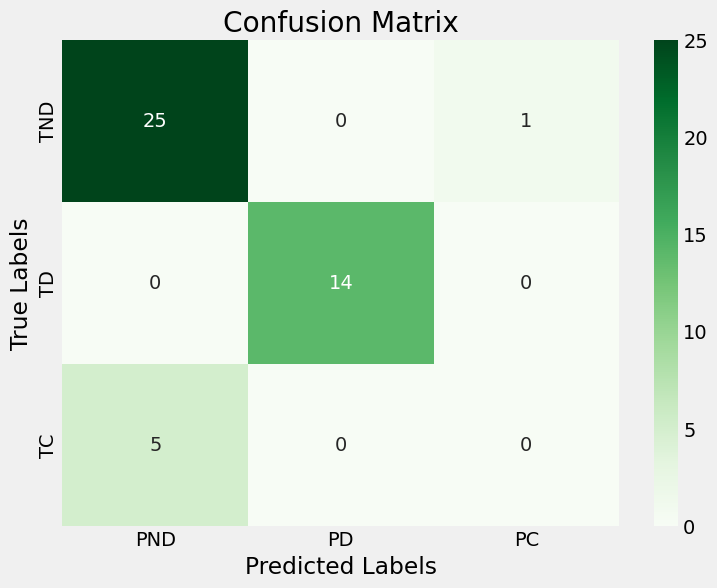

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')

    # Set custom tick locations and labels for both x-axis and y-axis
    plt.xticks(ticks=[0.5, 1.5, 2.5], labels=classes)
    plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['TND', 'TD', 'TC'])

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, ['PND', 'PD', 'PC'])


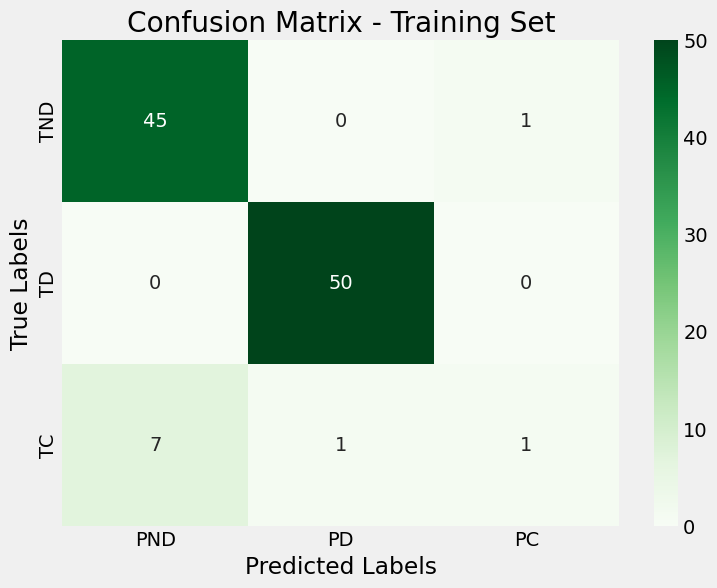

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        46
           1       0.98      1.00      0.99        50
           2       0.50      0.11      0.18         9

    accuracy                           0.91       105
   macro avg       0.78      0.70      0.70       105
weighted avg       0.89      0.91      0.89       105



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Group'])
y = df['Group']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the SVM model
svm_model = SVC(kernel='linear', gamma='auto', C=10)  # You can adjust the hyperparameters as needed

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = svm_model.predict(X_train)

# Compute confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Display the confusion matrix for the training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['TND', 'TD', 'TC'])
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['PND', 'PD', 'PC'])
plt.show()

# Print classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train))


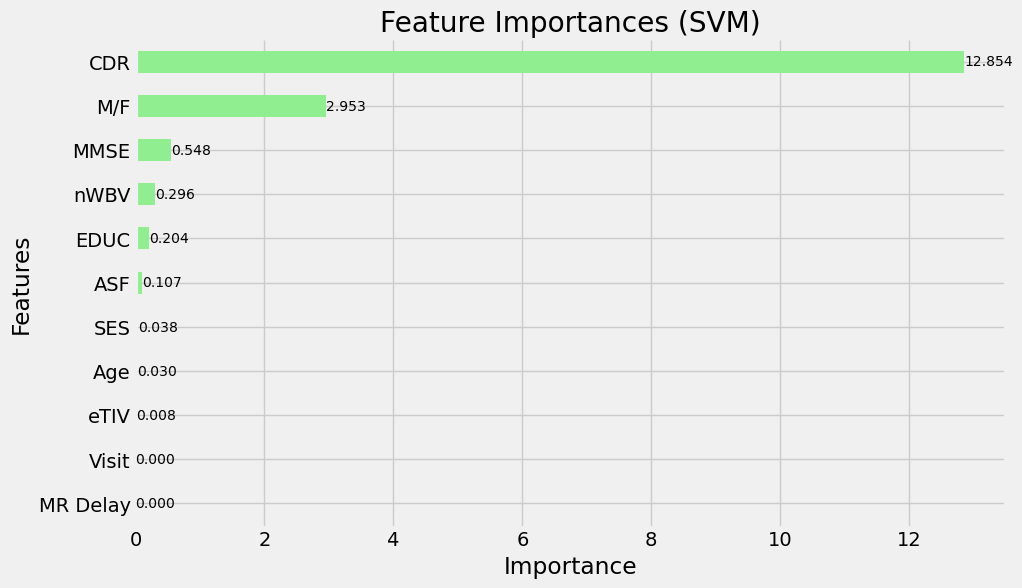

In [ ]:
# Extract feature importances from the SVM model coefficients
svm_importances = pd.Series(abs(svm_model.coef_[0]), index=X.columns)

# Plot feature importances
plt.figure(figsize=(10, 6))
ax = svm_importances.sort_values().plot(kind='barh', color='lightgreen')  # Horizontal bar plot
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances (SVM)')

# Annotate each bar with its value
for index, value in enumerate(svm_importances.sort_values()):
    ax.text(value, index, f'{value:.3f}', va='center', ha='left', fontsize=10)

# Remove spines (upper and lower lines)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

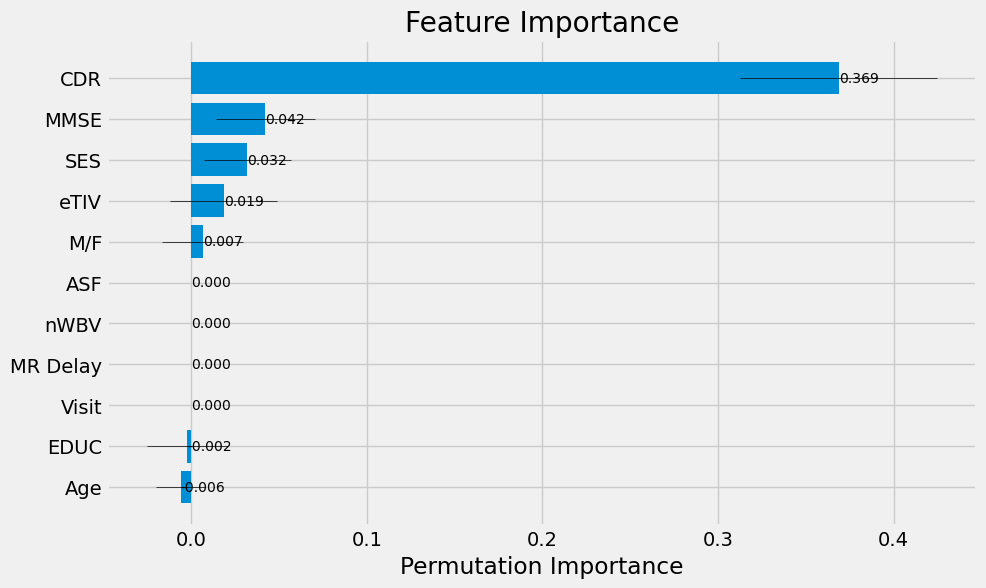

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=30, random_state=42)

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance with error bars and values
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')

# Add error bars to the bars with thin lines
std = perm_importance.importances_std[sorted_idx]
plt.errorbar(perm_importance.importances_mean[sorted_idx], range(len(sorted_idx)), xerr=std, fmt='none', color='black', elinewidth=0.5)

# Add values to each bar with larger font size
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{perm_importance.importances_mean[sorted_idx[i]]:.3f}',
             va='center', ha='left', fontsize=10)

# Assuming X_train is your original DataFrame
# Assuming X_train is your original DataFrame
plt.yticks(range(len(sorted_idx)), df.drop('Group', axis=1).columns[sorted_idx])


plt.show()

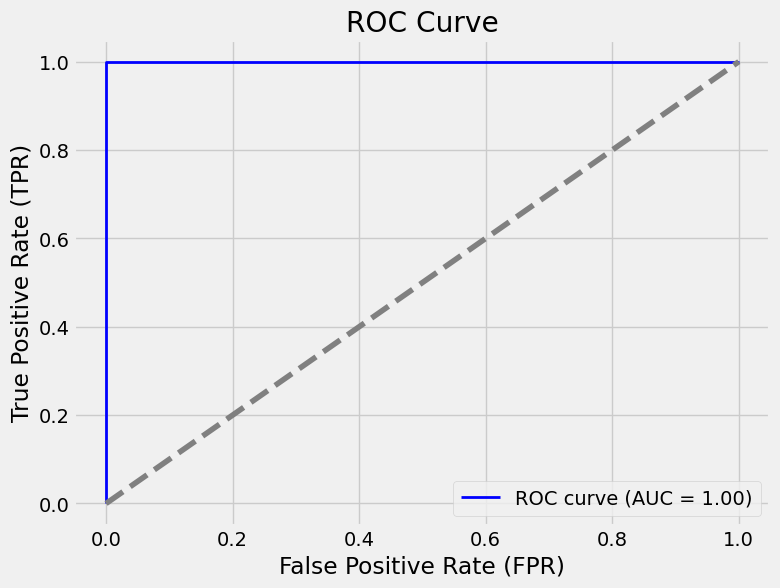

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Convert y_test to binary labels
y_test_binary = (y_test == 1)  # Assuming class 1 is the positive class

# Calculate decision function values
decision_values = svm_model.decision_function(X_test)

# Select the scores for the positive class
positive_scores = decision_values[:, 1]  # Assuming positive class is at index 1

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test_binary, positive_scores)

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test_binary, positive_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

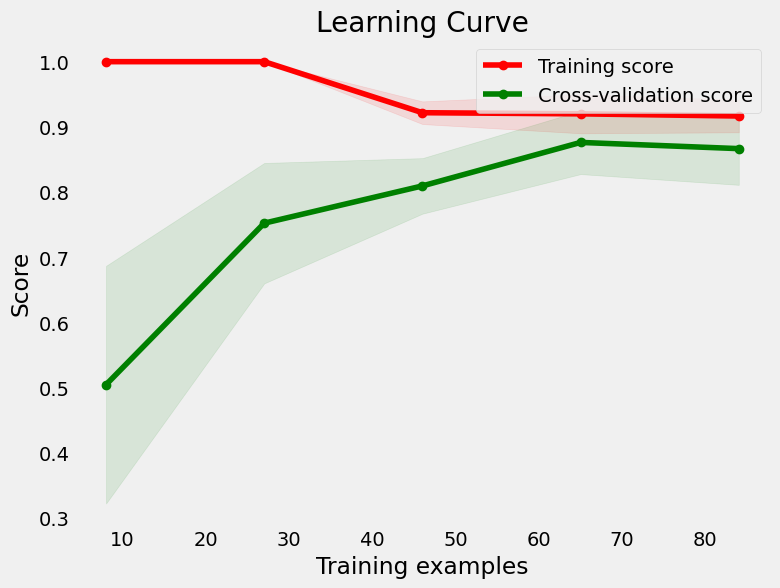

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the plot_learning_curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Call the plot_learning_curve function
plot_learning_curve(svm_model, "Learning Curve", X_train, y_train, cv=5)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions on the training set
y_train_pred = svm_model.predict(X_train)

# Calculate confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)

print("Confusion Matrix for the training set:")
print(cm_train)


Confusion Matrix for the training set:
[[45  0  1]
 [ 0 50  0]
 [ 7  1  1]]


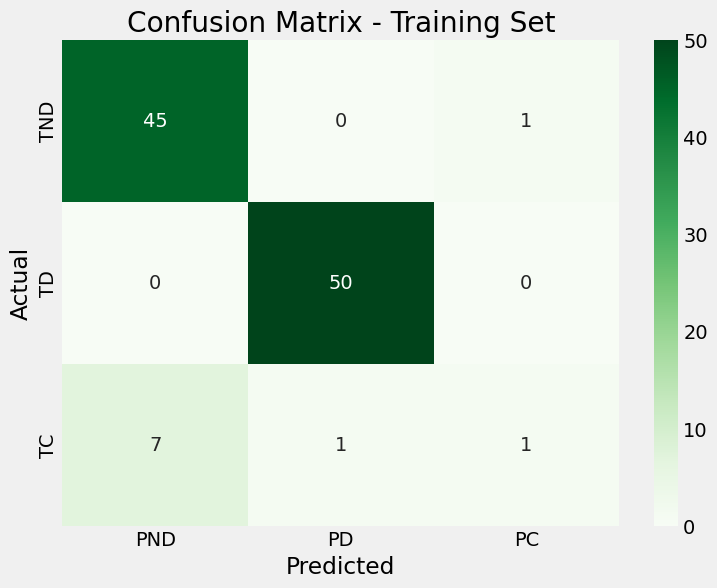

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=classes, yticklabels=['TND', 'TD', 'TC'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for training set
y_train_pred = svm_model.predict(X_train)
plot_confusion_matrix(y_train, y_train_pred, ['PND', 'PD', 'PC'], 'Confusion Matrix - Training Set')


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame called 'df1'

# Split the data into features and target variable
X = df.drop(columns=['Group'])
y = df['Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the SVM model
svm_model = SVC(kernel='linear', gamma='auto', C=10)
# Train the classifier
svm_model.fit(X_train, y_train)

SVC(C=10, gamma='auto', kernel='linear')

In [ ]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       1.00      1.00      1.00        14
           2       0.00      0.00      0.00         5

    accuracy                           0.87        45
   macro avg       0.61      0.65      0.63        45
weighted avg       0.79      0.87      0.83        45

Confusion Matrix:
[[25  0  1]
 [ 0 14  0]
 [ 5  0  0]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming svm_model is your trained SVM model and X_test, y_test are your test data
y_pred = svm_model.predict(X_test)

# Calculate confusion matrix
cm_test = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for the test set with 45 subjects:")
print(cm_test)


Confusion Matrix for the test set with 45 subjects:
[[25  0  1]
 [ 0 14  0]
 [ 5  0  0]]


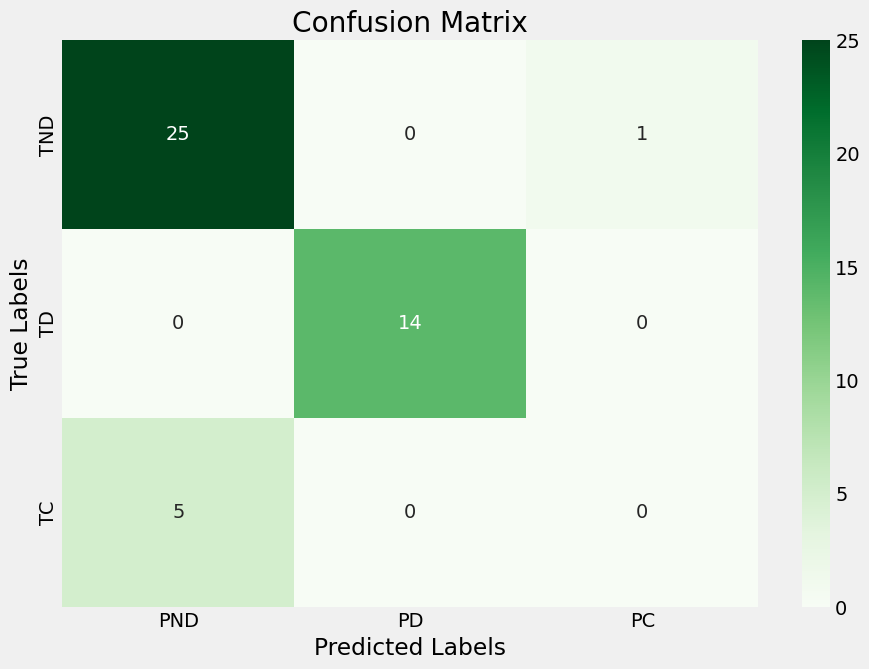

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       1.00      1.00      1.00        14
           2       0.00      0.00      0.00         5

    accuracy                           0.87        45
   macro avg       0.61      0.65      0.63        45
weighted avg       0.79      0.87      0.83        45



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you've already trained your classifier and made predictions
# y_pred = clf.predict(X_test)

# Compute confusion matrix for multi-class
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['PND', 'PD', 'PC'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['TND', 'TD', 'TC'])
plt.show()

# For detailed metrics per class, you can print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# Assuming you have your data stored in variables X and y
# X is your feature matrix, and y is your target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define combinations of RBF and C values
params = [
    {'gamma': 1.0E-4, 'C': 100},
    {'gamma': 1.0E-3, 'C': 100},
    {'gamma': 1.0E-1, 'C': 10}
]

# Create and train SVM models for each parameter combination
svm_models = []
for i, param in enumerate(params):
    # Create an SVM classifier
    clf = svm.SVC(kernel='rbf', **param)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Append the trained model to the list
    svm_models.append(clf)

# Print details and accuracy for each model
for i, model in enumerate(svm_models):
    print(f"Model {i+1} Details:")
    print("Parameters:", model.get_params())
    print("Support vectors count:", len(model.support_))
    print("Training accuracy:", model.score(X_train, y_train))
    print("Testing accuracy:", model.score(X_test, y_test))
    print()


Model 1 Details:
Parameters: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Support vectors count: 77
Training accuracy: 0.8571428571428571
Testing accuracy: 0.6888888888888889

Model 2 Details:
Parameters: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Support vectors count: 78
Training accuracy: 0.9809523809523809
Testing accuracy: 0.5777777777777777

Model 3 Details:
Parameters: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kern

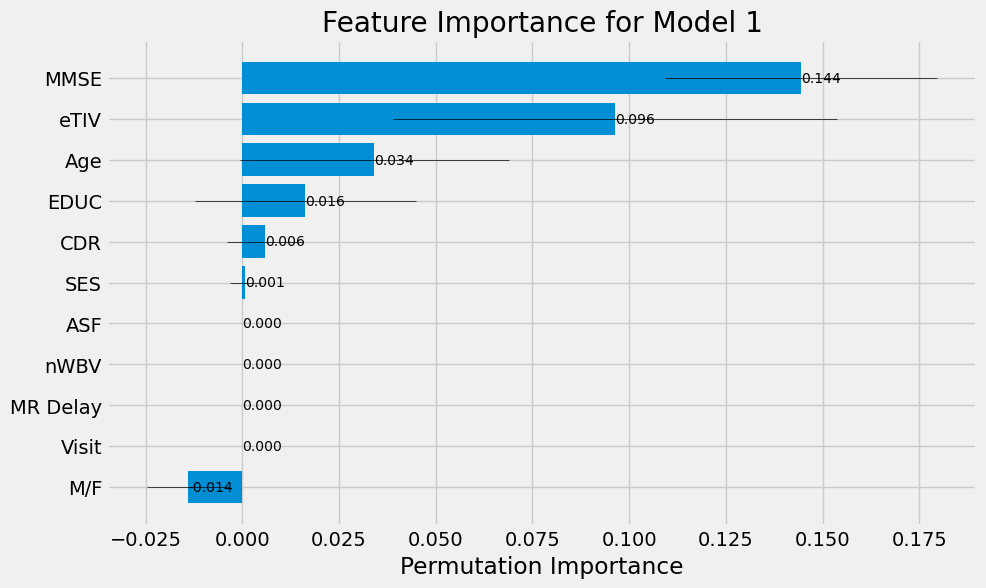

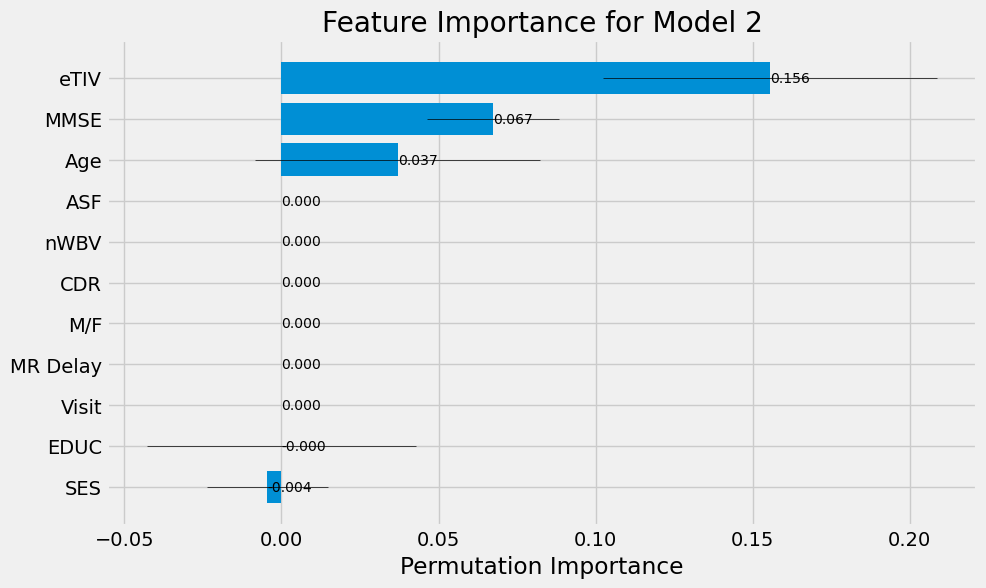

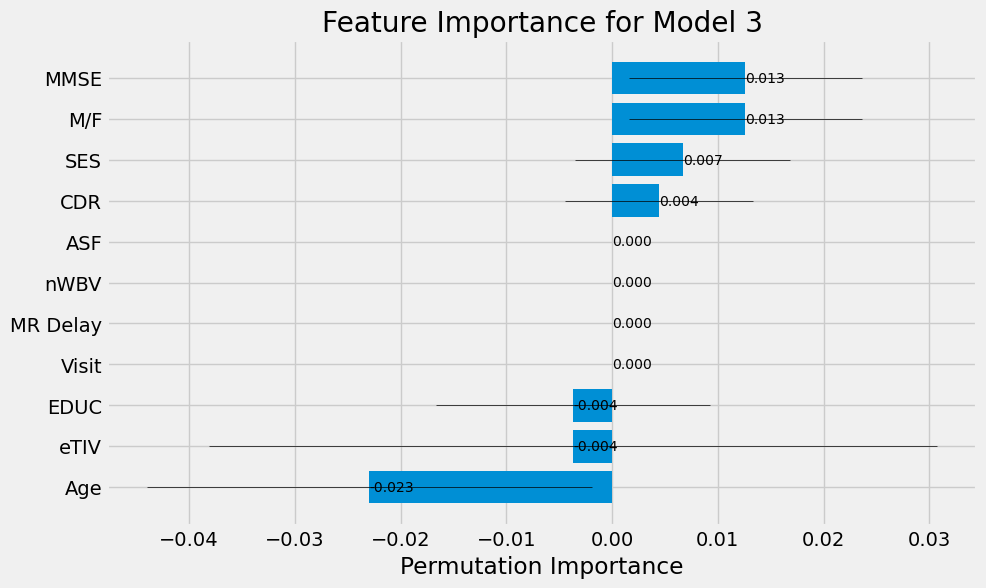

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Define a list to store permutation importance results for each model
perm_importances = []

# Loop through each SVM model
for i, model in enumerate(svm_models):
    # Perform permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

    # Append the permutation importance results to the list
    perm_importances.append(perm_importance)

    # Sort feature importance
    sorted_idx = perm_importance.importances_mean.argsort()

    # Plot permutation importance with error bars and values
    plt.figure(figsize=(10, 6))
    bars = plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
    plt.xlabel('Permutation Importance')
    plt.title(f'Feature Importance for Model {i+1}')

    # Add error bars to the bars with thin lines
    std = perm_importance.importances_std[sorted_idx]
    plt.errorbar(perm_importance.importances_mean[sorted_idx], range(len(sorted_idx)), xerr=std, fmt='none', color='black', elinewidth=0.5)

    # Add values to each bar with larger font size
    for i, bar in enumerate(bars):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{perm_importance.importances_mean[sorted_idx[i]]:.3f}',
                 va='center', ha='left', fontsize=10)

    # Assuming X_train is your original DataFrame
    plt.yticks(range(len(sorted_idx)), df.drop('Group', axis=1).columns[sorted_idx])

    plt.show()

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np  # Assuming you have numpy imported

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Extract features (X) and labels (y) from the DataFrame
X = df_numeric.drop(columns=['Group'])
y = df['Group']

# Split the data into training and testing sets
# Use 45 cases for testing (30% of 150)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define combinations of RBF and C values
params = [
    {'kernel': 'rbf', 'gamma': 1.0E-4, 'C': 100},
    {'kernel': 'rbf', 'gamma': 1.0E-3, 'C': 100},
    {'kernel': 'rbf', 'gamma': 1.0E-1, 'C': 10}
]

# Train and evaluate SVM models for each parameter combination
svm_models = []  # List to store trained SVM models
for i, param in enumerate(params):
    # Create an SVM classifier
    svm_model = svm.SVC(**param)

    # Train the classifier
    svm_model.fit(X_train, y_train)

    # Add the trained model to the list
    svm_models.append(svm_model)

    # Make predictions
    predictions = svm_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {i+1} Accuracy:", accuracy)

# Now svm_models[0] contains svm_model1, svm_models[1] contains svm_model2, and svm_models[2] contains svm_model3

Model 1 Accuracy: 0.6888888888888889
Model 2 Accuracy: 0.5777777777777777
Model 3 Accuracy: 0.3333333333333333


In [ ]:
from sklearn.metrics import confusion_matrix

# Function to print confusion matrix
def print_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    print(title)
    print(cm)
    print()

# Print confusion matrix for each SVM model
for i, model in enumerate(svm_models):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print confusion matrix
    print_confusion_matrix(y_test, y_pred, f'Confusion Matrix for Model {i+1}:')


Confusion Matrix for Model 1:
[[19  6  1]
 [ 2 12  0]
 [ 4  1  0]]

Confusion Matrix for Model 2:
[[14  8  4]
 [ 2 11  1]
 [ 2  2  1]]

Confusion Matrix for Model 3:
[[ 1 24  1]
 [ 0 14  0]
 [ 0  5  0]]



Confusion Matrix for Model 1:
[[19  6  1]
 [ 2 12  0]
 [ 4  1  0]]



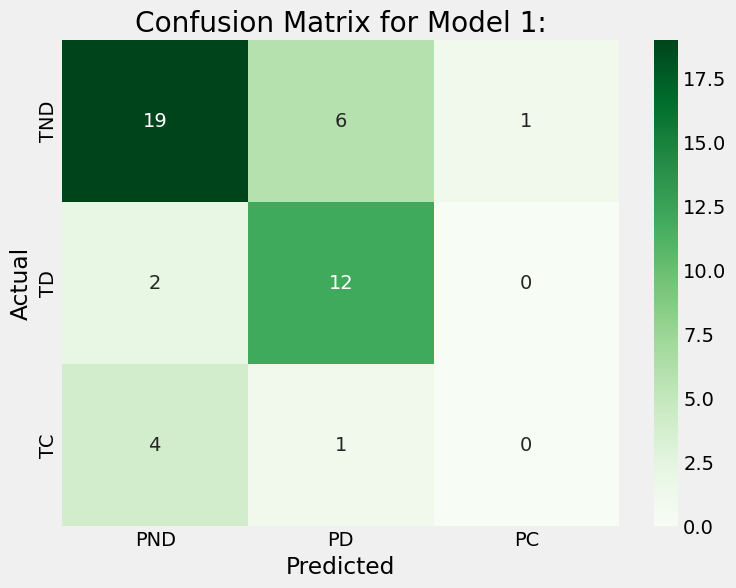

Confusion Matrix for Model 2:
[[14  8  4]
 [ 2 11  1]
 [ 2  2  1]]



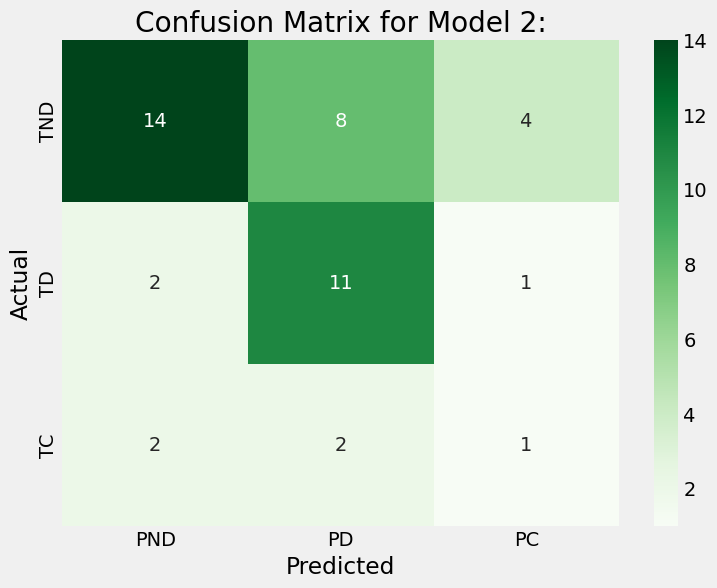

Confusion Matrix for Model 3:
[[ 1 24  1]
 [ 0 14  0]
 [ 0  5  0]]



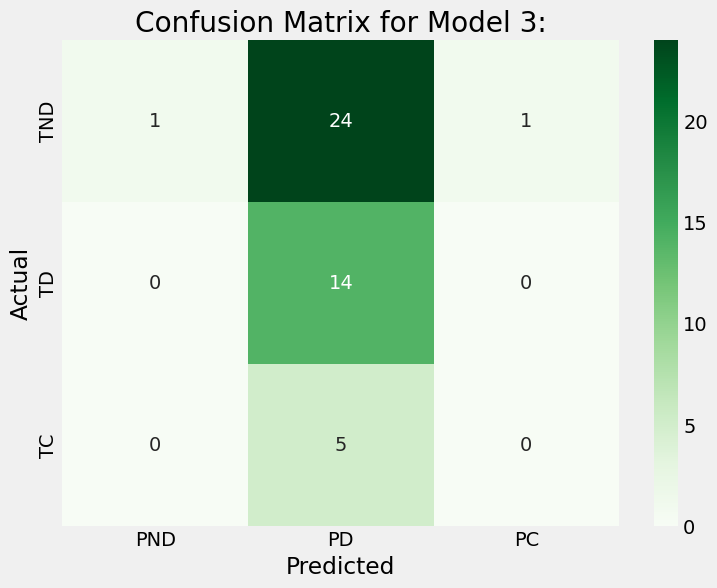

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='g',
                xticklabels=['PND', 'PD', 'PC'],
                yticklabels=['TND', 'TD', 'TC'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to print confusion matrix
def print_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    print(title)
    print(cm)
    print()
    # Plot confusion matrix
    plot_confusion_matrix(cm, title)

# Print and plot confusion matrix for each SVM model
for i, model in enumerate(svm_models):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print and plot confusion matrix
    print_confusion_matrix(y_test, y_pred, f'Confusion Matrix for Model {i+1}:')


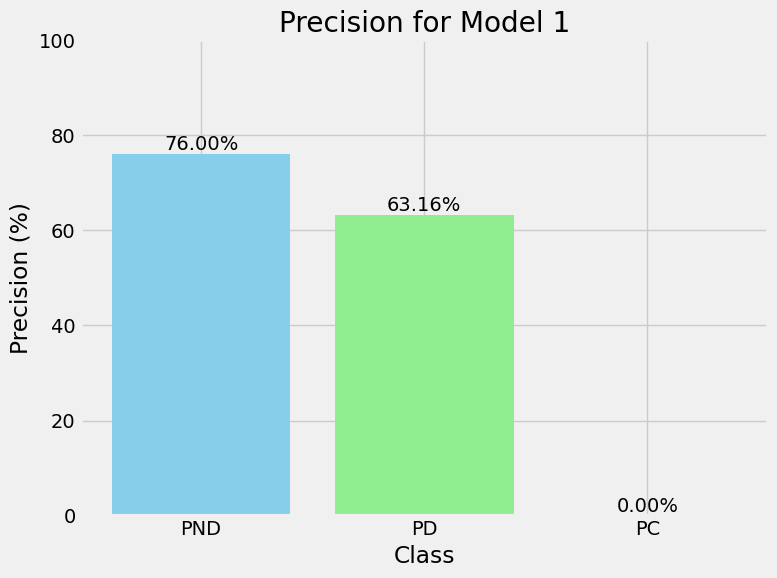

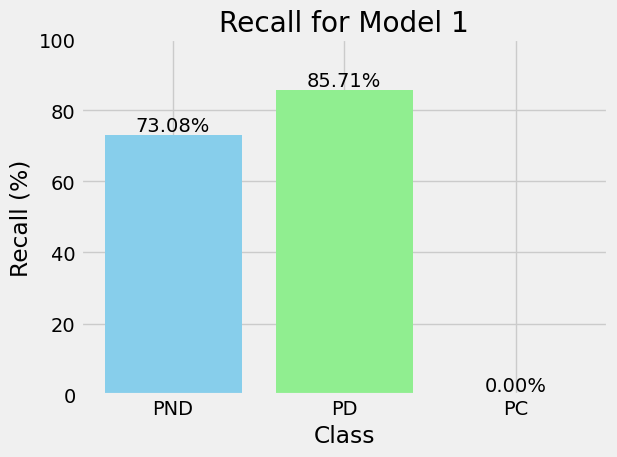

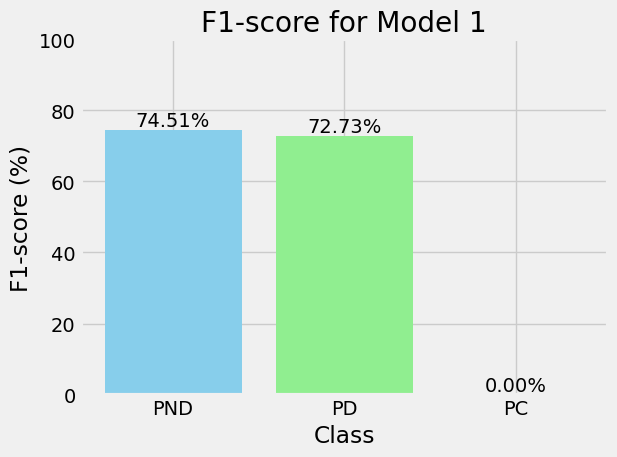

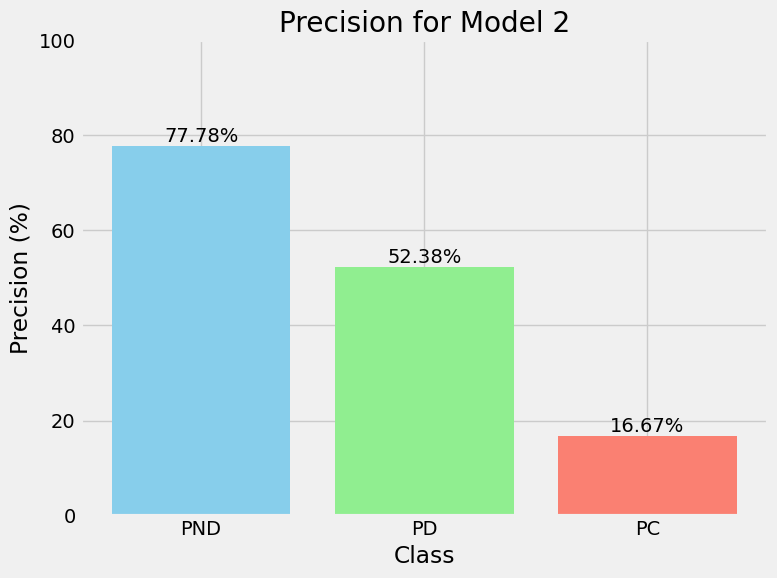

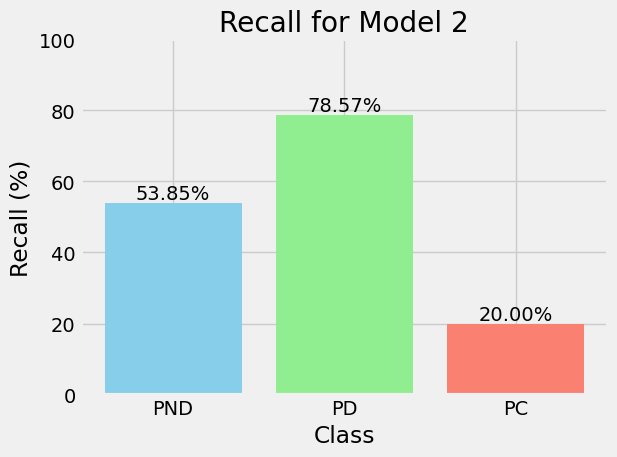

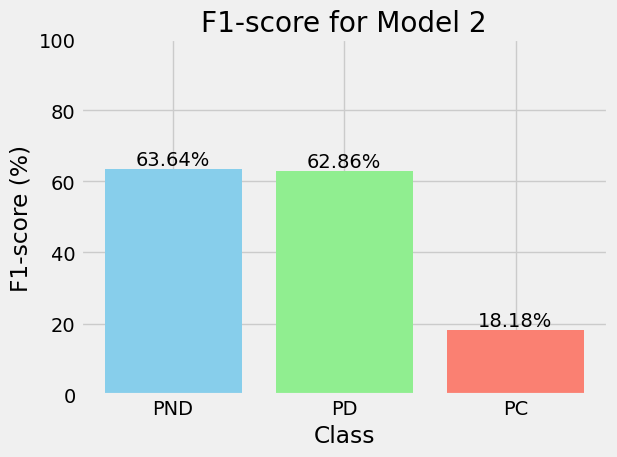

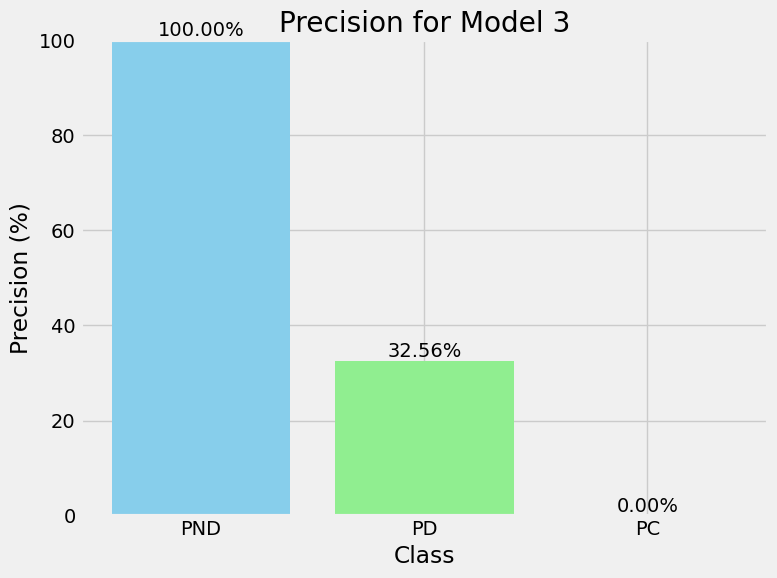

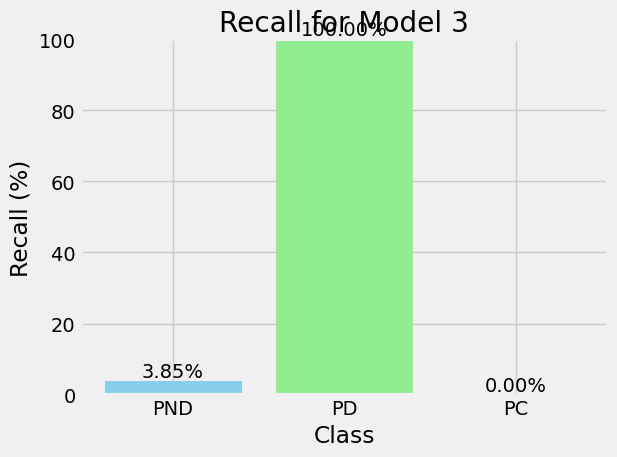

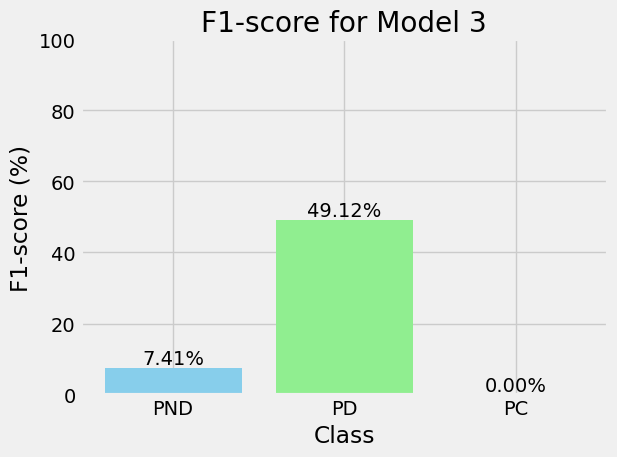

In [ ]:
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Ignore import warnings
warnings.filterwarnings("ignore")

# Function to plot classification metrics
def plot_classification_metrics(report, title, model_colors):
    metrics = ['precision', 'recall', 'f1-score']
    labels = ['PND', 'PD', 'PC']

    plt.figure(figsize=(8, 6))
    for metric in metrics:
        values = [report[label][metric] * 100 for label in labels]
        bars = plt.bar(labels, values, color=model_colors)

        # Annotate bars with their respective values
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}%',
                     ha='center', va='bottom')

        plt.title(f'{metric.capitalize()} for {title}')
        plt.xlabel('Class')
        plt.ylabel(metric.capitalize() + ' (%)')
        plt.ylim(0, 100)
        plt.tight_layout()
        plt.show()

# Define colors for each class
class_colors = {'PND': 'skyblue', 'PD': 'lightgreen', 'PC': 'salmon'}

# Calculate classification report for each SVM model
for i, model in enumerate(svm_models):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate classification report
    report = classification_report(y_test, y_pred, target_names=['PND', 'PD', 'PC'], output_dict=True)

    # Plot classification metrics
    plot_classification_metrics(report, f'Model {i+1}', [class_colors[label] for label in ['PND', 'PD', 'PC']])


In [ ]:
# Function to print confusion matrix
def print_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    print(title)
    print(cm)
    print()

# Print confusion matrix for each SVM model using training set
for i, model in enumerate(svm_models):
    # Make predictions on the training set
    y_train_pred = model.predict(X_train)

    # Print confusion matrix
    print_confusion_matrix(y_train, y_train_pred, f'Confusion Matrix for Training Set - Model {i+1}')


Confusion Matrix for Training Set - Model 1
[[45  1  0]
 [ 8 41  1]
 [ 4  1  4]]

Confusion Matrix for Training Set - Model 2
[[44  2  0]
 [ 0 50  0]
 [ 0  0  9]]

Confusion Matrix for Training Set - Model 3
[[46  0  0]
 [ 0 50  0]
 [ 0  0  9]]



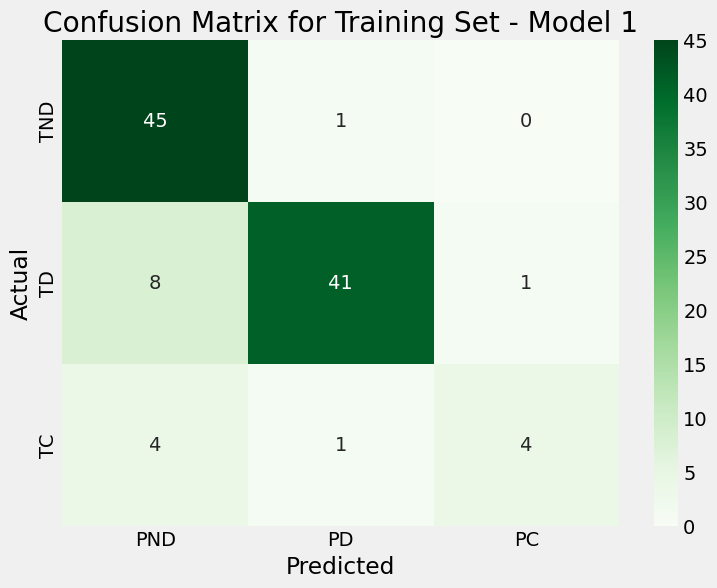

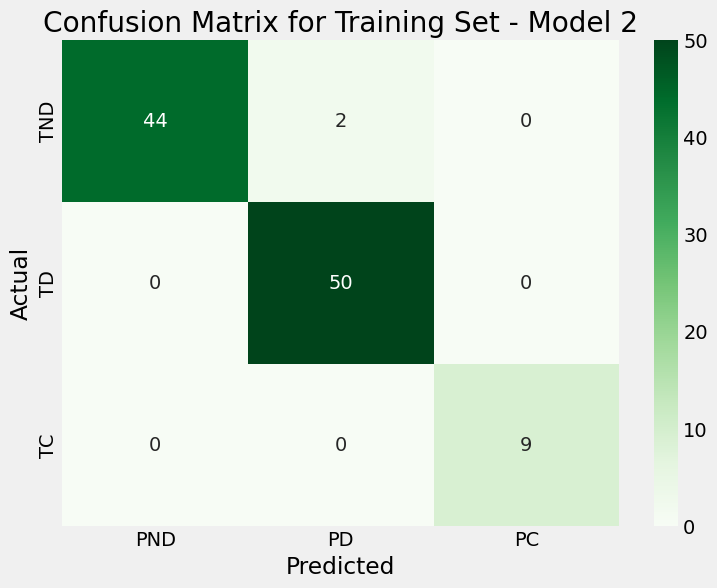

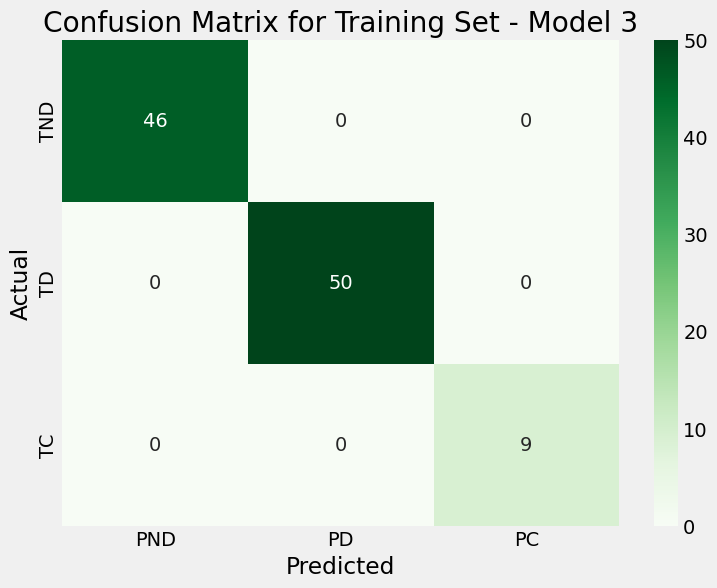

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='g',
                xticklabels=['PND', 'PD', 'PC'],
                yticklabels=['TND', 'TD', 'TC'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each SVM model
for i, model in enumerate(svm_models):
    # Make predictions on the training set
    y_train_pred = model.predict(X_train)

    # Calculate confusion matrix for training set
    cm_train = confusion_matrix(y_train, y_train_pred)

    # Plot confusion matrix
    plot_confusion_matrix(cm_train, f'Confusion Matrix for Training Set - Model {i+1}')


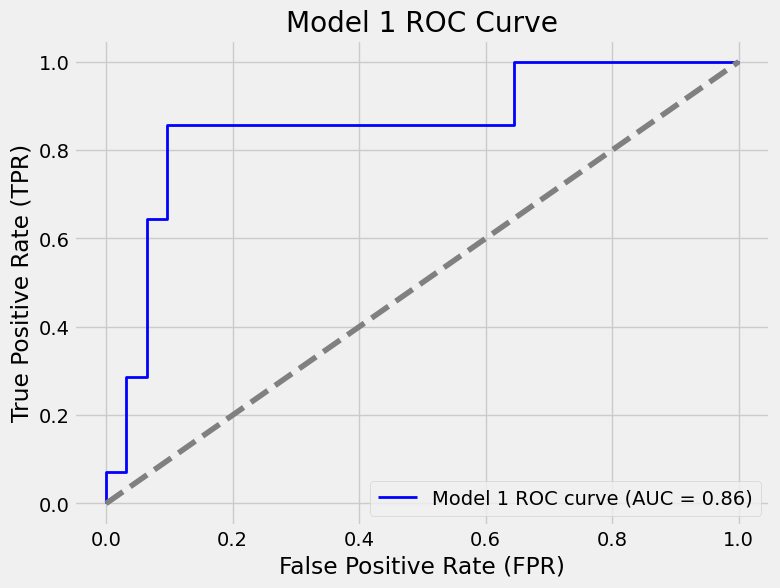

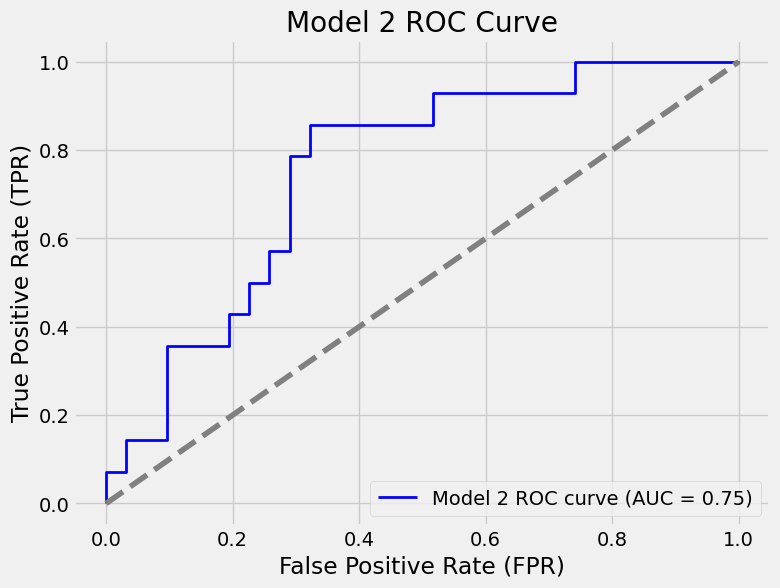

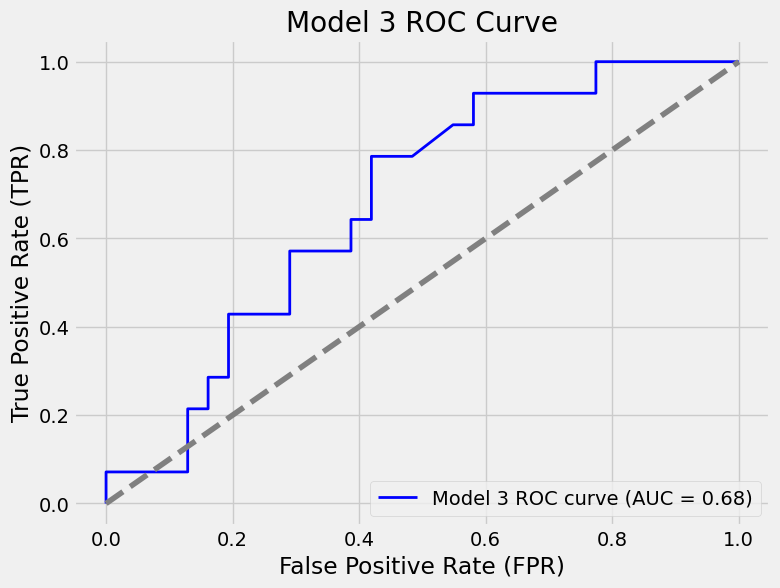

Model 1 AUC: 0.86
Model 2 AUC: 0.75
Model 3 AUC: 0.68


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have trained SVM models named svm_models[0], svm_models[1], and svm_models[2]
svm_models = [svm_models[0], svm_models[1], svm_models[2]]

# Initialize a list to store AUC values
auc_values = []

# Plot ROC curve for each SVM model
for i, model in enumerate(svm_models):
    # Calculate decision function values
    decision_values = model.decision_function(X_test)

    # Select the scores for the positive class
    positive_scores = decision_values[:, 1]  # Assuming positive class is at index 1

    # Convert y_test to binary labels
    y_test_binary = (y_test == 1)  # Assuming class 1 is the positive class

    # Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test_binary, positive_scores)

    # Calculate the Area Under the ROC Curve (AUC)
    auc = roc_auc_score(y_test_binary, positive_scores)
    auc_values.append(auc)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Model {i+1} ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Model {i+1} ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Print AUC values
for i, auc in enumerate(auc_values):
    print(f"Model {i+1} AUC: {auc:.2f}")


In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

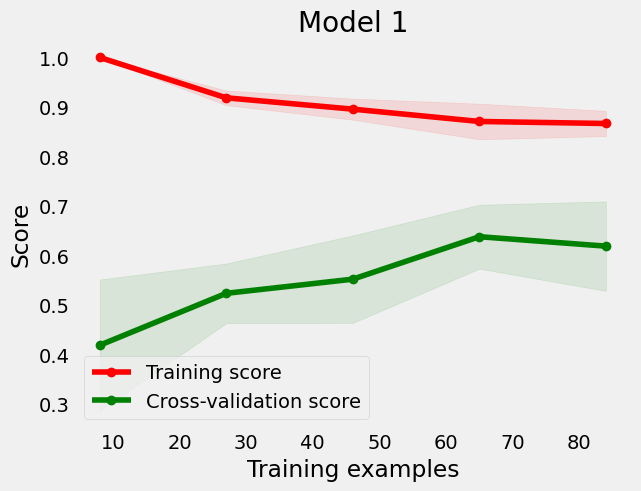

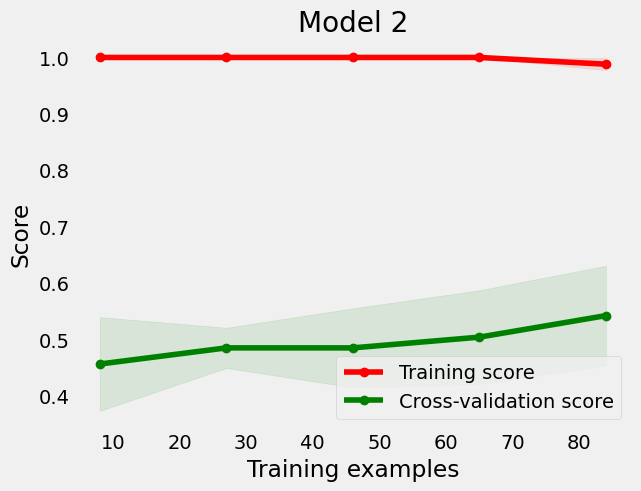

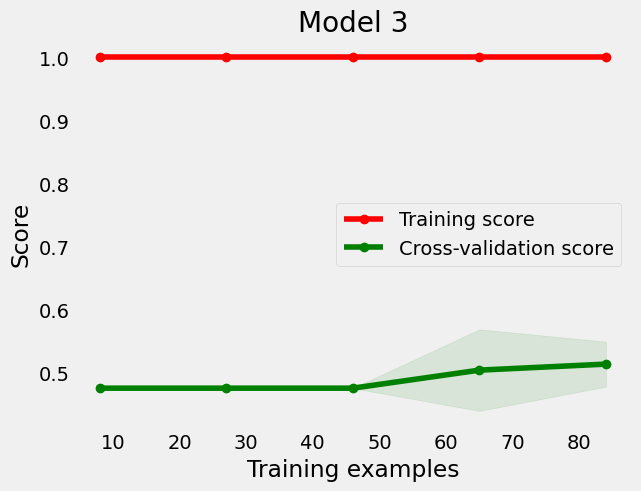

In [ ]:
# Call the plot_learning_curve function for svm_models[0]
plot_learning_curve(svm_models[0], "Learning Curve (Model 1)", X_train, y_train, cv=5)
plt.title("Model 1")
plt.show()

# Call the plot_learning_curve function for svm_models[1]
plot_learning_curve(svm_models[1], "Learning Curve (Model 2)", X_train, y_train, cv=5)
plt.title("Model 2")
plt.show()

# Call the plot_learning_curve function for svm_models[2]
plot_learning_curve(svm_models[2], "Learning Curve (Model 3)", X_train, y_train, cv=5)
plt.title("Model 3")
plt.show()

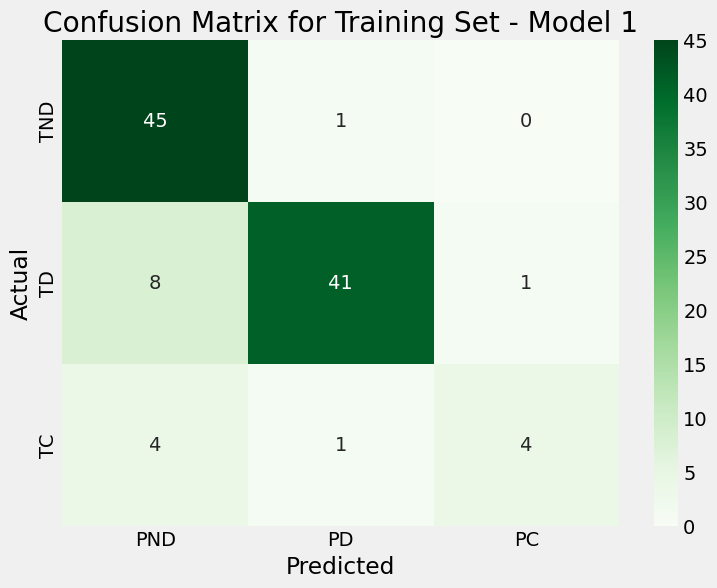

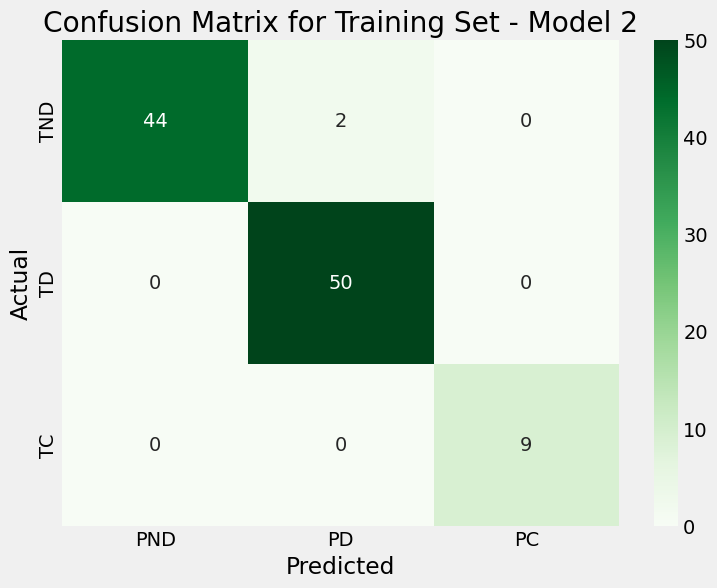

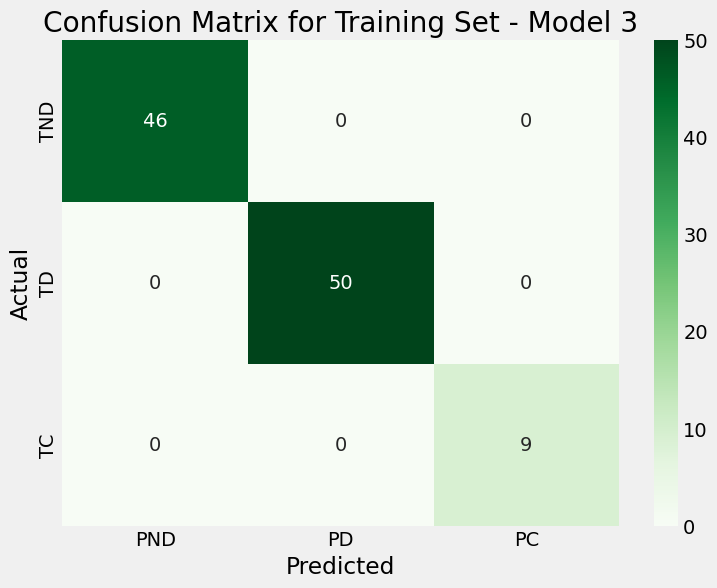

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='g',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_names)
    plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['TND', 'TD', 'TC'])
    plt.show()

# Define class names
class_names = ['PND', 'PD', 'PC']

# Plot confusion matrix for each SVM model
for i, model in enumerate(svm_models):
    # Make predictions on the training set
    y_train_pred = model.predict(X_train)

    # Calculate confusion matrix for training set
    cm_train = confusion_matrix(y_train, y_train_pred)

    # Plot confusion matrix
    plot_confusion_matrix(cm_train, f'Confusion Matrix for Training Set - Model {i+1}', class_names)


<Figure size 640x480 with 0 Axes>

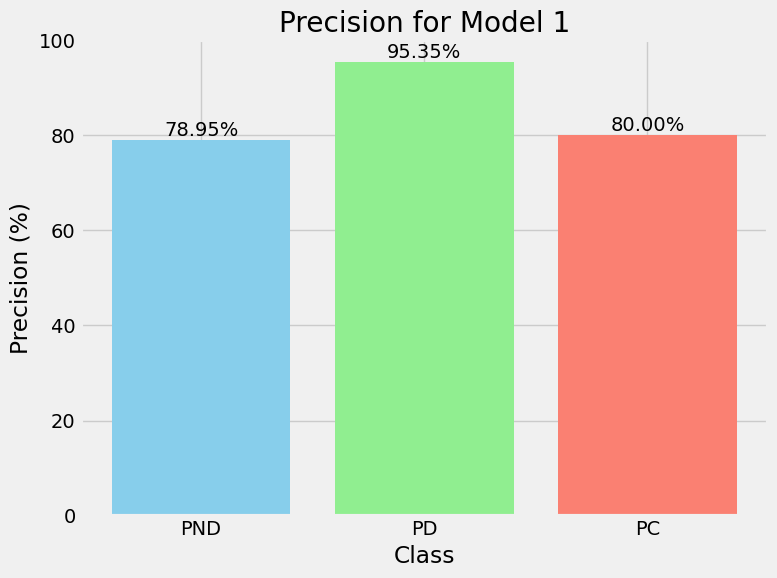

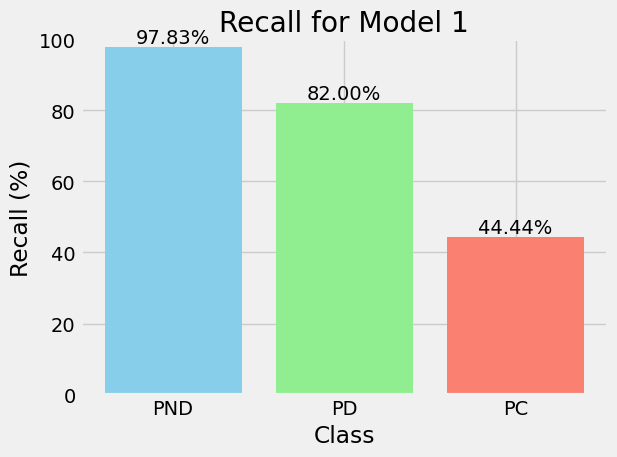

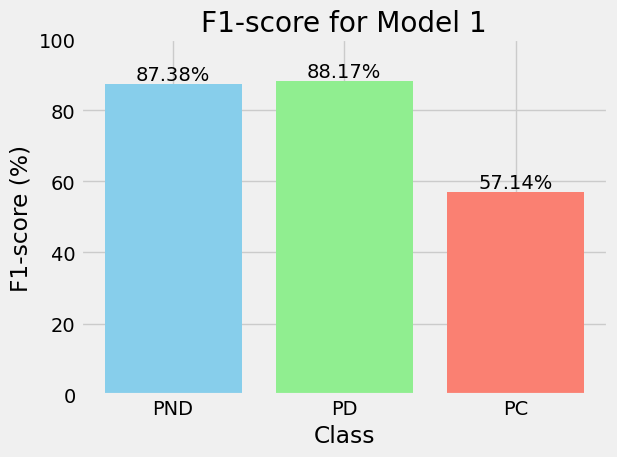

<Figure size 640x480 with 0 Axes>

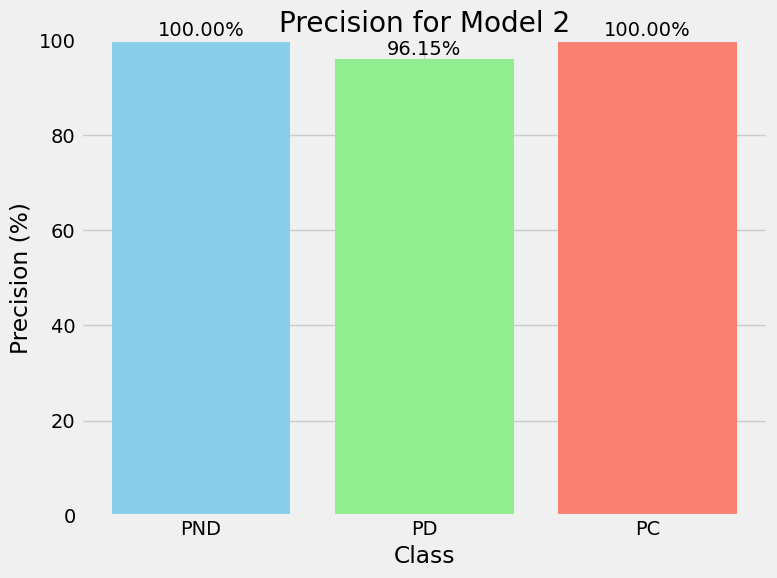

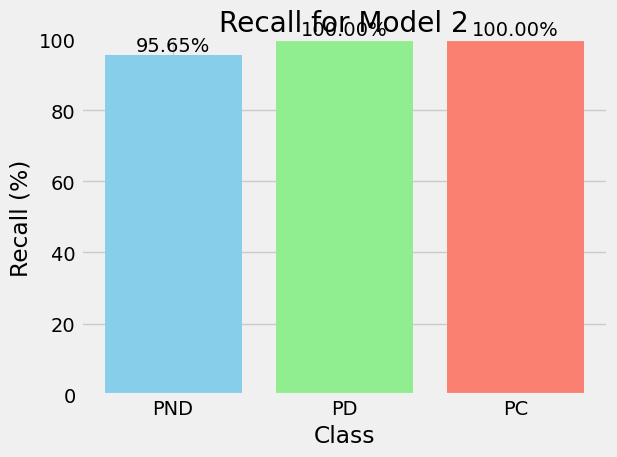

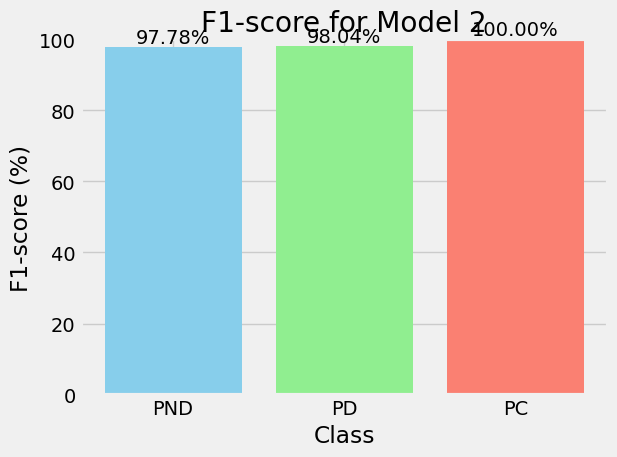

<Figure size 640x480 with 0 Axes>

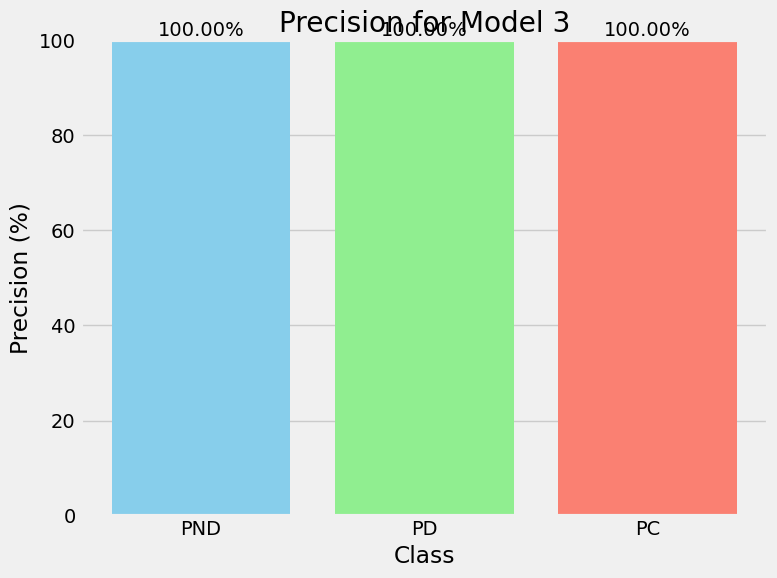

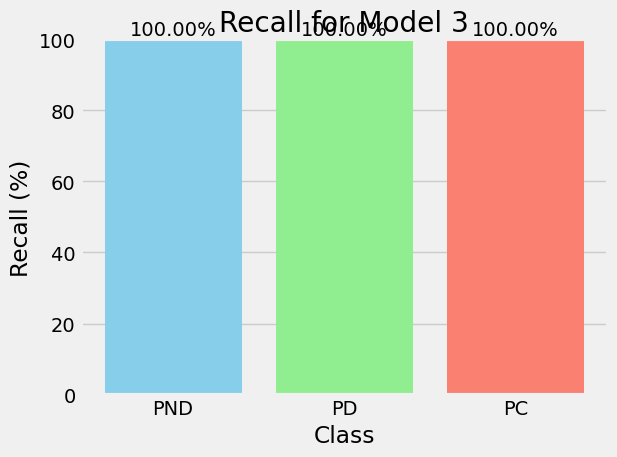

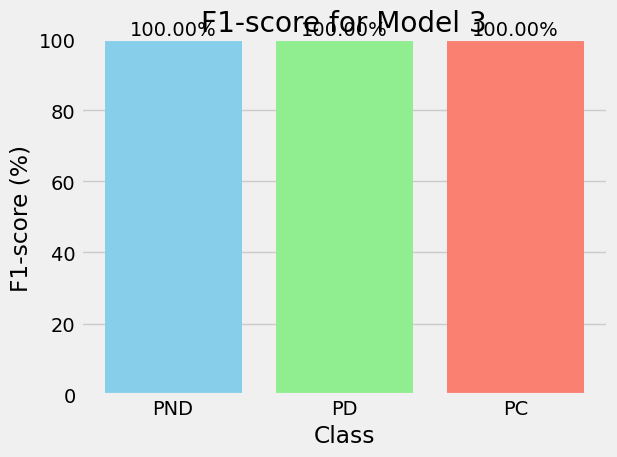

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Ignore import warnings
import warnings
warnings.filterwarnings("ignore")

# Function to plot classification metrics
def plot_classification_metrics(report, title, model_colors):
    metrics = ['precision', 'recall', 'f1-score']
    labels = ['PND', 'PD', 'PC']

    plt.figure(figsize=(8, 6))
    for metric in metrics:
        values = [report[label][metric] * 100 for label in labels]
        bars = plt.bar(labels, values, color=model_colors)

        # Annotate bars with their respective values
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}%',
                     ha='center', va='bottom')

        plt.title(f'{metric.capitalize()} for {title}')
        plt.xlabel('Class')
        plt.ylabel(metric.capitalize() + ' (%)')
        plt.ylim(0, 100)
        plt.tight_layout()
        plt.show()

# Define colors for each class
class_colors = {'PND': 'skyblue', 'PD': 'lightgreen', 'PC': 'salmon'}

# Calculate classification report for each SVM model
for i, model in enumerate(svm_models):
    # Make predictions on the training set
    y_pred = model.predict(X_train)

    # Calculate classification report
    report = classification_report(y_train, y_pred, target_names=['PND', 'PD', 'PC'], output_dict=True)

    # Adjust spacing between title and plot
    plt.subplots_adjust(top=0.85)

    # Plot classification metrics
    plot_classification_metrics(report, f'Model {i+1}', [class_colors[label] for label in ['PND', 'PD', 'PC']])


In [ ]:
import warnings
warnings.resetwarnings()